In [729]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset

In [730]:
data = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [731]:
data.head(5)

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


In [732]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 10 columns):
Id             14384 non-null int64
Name           14384 non-null object
Age            14384 non-null int64
Nationality    14384 non-null object
Overall        14384 non-null int64
Potential      14384 non-null int64
Club           14173 non-null object
Value (M)      14384 non-null float64
Wage (M)       14384 non-null float64
Position       14384 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


In [733]:
data.describe()

,Id,Age,Overall,Potential,Value (M),Wage (M)
count,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000
mean,8992.892728,25.148776,66.237695,71.181869,2.344967,0.011435
std,5183.996368,4.620911,6.954458,6.074111,5.105376,0.022614
min,0.000000,16.000000,46.000000,46.000000,0.000000,0.000000
25%,4480.750000,21.000000,62.000000,67.000000,0.300000,0.002000
50%,9001.500000,25.000000,66.000000,71.000000,0.675000,0.004000
75%,13470.250000,28.000000,71.000000,75.000000,2.100000,0.012000
max,17980.000000,47.000000,94.000000,94.000000,105.000000,0.565000


#### We can drop the ID column as it does not contribute to the result in any way

In [734]:
data.drop('Id', axis = 1, inplace = True)

In [735]:
#Checking the name column
mergedStuff = pd.merge(data, test, on=['Name'], how='inner')
mergedStuff.shape

(464, 17)

###### only 464 of the names in train data are repeated in the test data. It doesn't contribute much to the model. Hence, we can drop the name column.

In [736]:
data.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [737]:
data.head()

,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


In [738]:
data.Position.nunique()

15

In [739]:
data.Nationality.nunique()

158

In [740]:
data.Club.nunique()

647

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

* 1)Age VS Wage
* 2)Top 5 nationalities to which the players belong
* 3)Top club in the dataset(acc to number of players)&the age range of players in that club(hist)
* 4)Which Nationality's players are valued more
* 5)Which position demands the highest potential

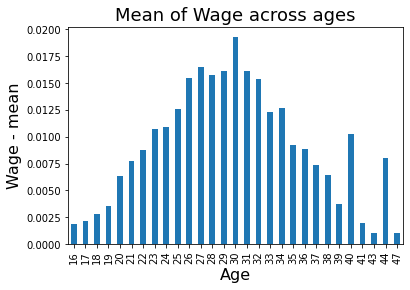

In [741]:
#Age VS Wage (distribution of wage acc to age groups)
data.groupby('Age')['Wage (M)'].agg(np.mean).plot(kind = 'bar')
plt.ylabel('Wage - mean', fontsize = 16)
plt.xlabel('Age', fontsize = 16)
plt.title('Mean of Wage across ages', fontsize = 18)
plt.show()

##### Players aged 30 have the highest average wage

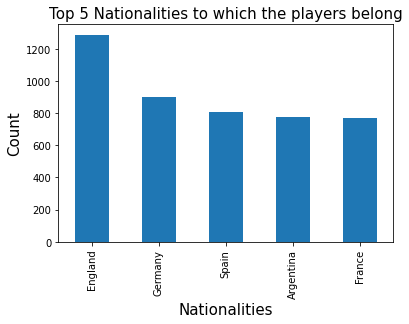

In [742]:
#Top 5 Nationalities to which the players belong
data.Nationality.value_counts()[:5].plot(kind = 'bar')
plt.xlabel('Nationalities', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Top 5 Nationalities to which the players belong', fontsize = 15)
plt.show()

In [743]:
#Top club in the dataset(acc to number of players)&the age range of players in that club(hist)
data.groupby('Club').agg(np.size).sort_values(by = 'Age', ascending = False)

,Age,Nationality,Overall,Potential,Value (M),Wage (M),Position
Club,,,,,,,
Villarreal CF,33,33,33,33,33.0,33.0,33
FC Nantes,31,31,31,31,31.0,31.0,31
Southampton,30,30,30,30,30.0,30.0,30
Stoke City,30,30,30,30,30.0,30.0,30
Everton,30,30,30,30,30.0,30.0,30
...,...,...,...,...,...,...,...
Bray Wanderers,13,13,13,13,13.0,13.0,13
Adelaide United,13,13,13,13,13.0,13.0,13
Clube Atlético Mineiro,13,13,13,13,13.0,13.0,13


* Villarreal CF is the club with maximum number of players
* Now find the age range in this club

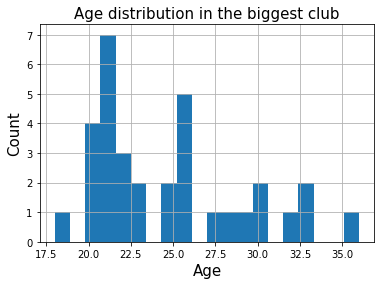

In [744]:
#Age distribution in the biggest club
data[data['Club'] == 'Villarreal CF']['Age'].hist(bins = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Age distribution in the biggest club', fontsize = 15)
plt.show()

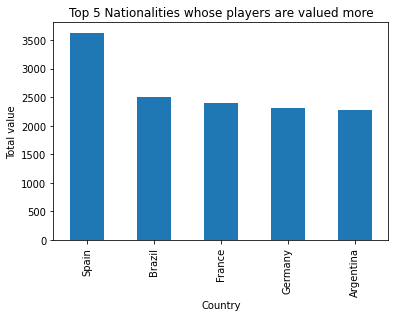

In [745]:
#Top 5 Nationalities whose players are valued more
data.groupby('Nationality')['Value (M)'].agg(np.sum).sort_values(ascending = False)[:5].plot(kind = 'bar')
plt.title('Top 5 Nationalities whose players are valued more')
plt.xlabel('Country')
plt.ylabel('Total value')
plt.show()

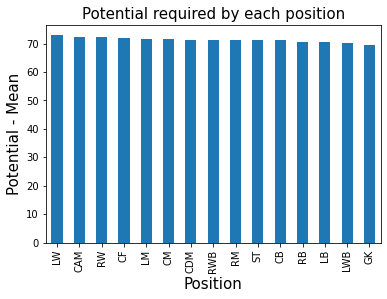

In [746]:
#Which position demands the highest potential
data.groupby('Position')['Potential'].agg(np.mean).sort_values(ascending = False).plot(kind = 'bar')
plt.title("Potential required by each position", fontsize = 15)
plt.xlabel('Position', fontsize = 15)
plt.ylabel('Potential - Mean', fontsize = 15)
plt.show()

#### All positions require comparable average of  potentials but LW demands more strength from the players

## ONE HOT ENCODING - Position, Nationality, Club

###### Nationality can be label encodoed as there are 158 nationalities only which is very small as compared to the datset size.

In [747]:
#Encoding Nationality
# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['Nationality']= label_encoder.fit_transform(data['Nationality']) 
print(data.head())

   Age  Nationality  Overall  Potential           Club  Value (M)  Wage (M)  \
0   25           58       54         58  Korona Kielce       0.07     0.001   
1   21           76       64         73       Cagliari       0.70     0.010   
2   21           12       72         79       Atalanta       3.70     0.013   
3   21          109       57         66      Stevenage       0.16     0.002   
4   19            5       63         75   Boca Juniors       0.55     0.002   

  Position  
0      CDM  
1       CM  
2       RB  
3       CM  
4       LB  


Position_encoder = preprocessing.LabelEncoder()
#Encode labels in column 'Country'. 
data['Position']= Position_encoder.fit_transform(data['Position']) 
print(data.head())

In [748]:
#One hot encoding Position column
Position_dummies = pd.get_dummies(data.Position)
Position_dummies

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14379,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
14380,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
14381,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14382,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [749]:
#merging the dummies with the dataframe
data = pd.concat([data,Position_dummies], axis = 'columns')
data.drop('Position', axis = 1, inplace = True)

In [750]:
data.head()

,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),CAM,CB,CDM,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,25,58,54,58,Korona Kielce,0.07,0.001,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,21,76,64,73,Cagliari,0.70,0.010,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,12,72,79,Atalanta,3.70,0.013,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,21,109,57,66,Stevenage,0.16,0.002,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19,5,63,75,Boca Juniors,0.55,0.002,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [751]:
data.drop('Club', axis = 1, inplace = True)

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [752]:
#Separating the featres and the target variables
X = data.drop('Value (M)', axis = 1)
y = data['Value (M)']

In [753]:
#Splitting the data for linear regression(OLS method)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [754]:
#Fitting linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [755]:
#Predicting the target varibale for the test data(X_test) - y_pred
y_pred = linreg.predict(X_test)

In [756]:
#Using PolynomialFeatures to improve on the model
from sklearn.preprocessing import PolynomialFeatures    #Import the module
poly = PolynomialFeatures(degree = 3)    #Use degree 3 
X_poly = poly.fit_transform(X)     #Fit and transform the feature variables

In [757]:
#Splitting the dataset(polynomial) into test and train data
X_ptrain, X_ptest, y_ptrain, y_ptest = train_test_split(X_poly,y, test_size=0.2, random_state=111)

In [758]:
#Creating an object for the polynomial regression
lin2 = LinearRegression()    #Object - lin2
lin2.fit(X_ptrain, y_ptrain)    #Fitting on the transformed train data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [759]:
#Predicting using the polynomial regressor
y_ppred = lin2.predict(X_ptest)

In [760]:
#Computing the r2_score with linear regression model
from sklearn.metrics import r2_score
rsquared = r2_score(y_test, y_pred)
print(rsquared)

0.7397797483401198


In [761]:
#R-squared for polynomial regression
r_psquared = r2_score(y_ptest,y_ppred)
print(r_psquared)

0.976775114366372


In [762]:
#Experimenting with PolnomialFeatures attributes
from sklearn.preprocessing import PolynomialFeatures    #Import the module
poly = PolynomialFeatures(degree = 3, interaction_only=True)    #Use interaction only
X_ipoly = poly.fit_transform(X)     #Fit and transform the feature variables

In [763]:
#Splitting the dataset(polynomial) into test and train data
X_iptrain, X_iptest, y_iptrain, y_iptest = train_test_split(X_ipoly,y, test_size=0.2, random_state=111)

In [764]:
#Creating an object for the polynomial regression
lini2 = LinearRegression()    #Object - lini2
lini2.fit(X_iptrain, y_iptrain)    #Fitting on the transformed train data
#Predicting using the polynomial regressor
y_ippred = lini2.predict(X_iptest)

In [765]:
#R-squared for polynomial regression - interactions only
r_ipsquared = r2_score(y_iptest,y_ippred)
print(r_ipsquared)

0.938348253664961


### We an clearly see that polynomial regression including all the computations gives the highest r2_square score and hence is the best model to be used

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [766]:
#Storing the ID column in a variable
Id = test['Id']
test = test.drop('Id', axis = 1)
test.head()

,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,28,Mexico,82,82,Real Sociedad,0.046,ST
1,23,England,79,85,Manchester City,0.105,CB
2,22,Netherlands,67,74,Heracles Almelo,0.007,ST
3,27,Japan,65,65,Omiya Ardija,0.002,CAM
4,27,Germany,66,67,FSV Zwickau,0.001,LM


##### Performing the same operations on test data as train data

In [767]:
#Encoding Nationality
# Encode labels in column 'Country'. 
test['Nationality']= label_encoder.fit_transform(test['Nationality']) 
test.head()

,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,28,73,82,82,Real Sociedad,0.046,ST
1,23,36,79,85,Manchester City,0.105,CB
2,22,77,67,74,Heracles Almelo,0.007,ST
3,27,62,65,65,Omiya Ardija,0.002,CAM
4,27,45,66,67,FSV Zwickau,0.001,LM


In [768]:
#One hot encoding Position column
Position_dummies_test = pd.get_dummies(test.Position)

#merging the dummies with the dataframe
test = pd.concat([test,Position_dummies_test], axis = 'columns')
test.drop('Position', axis = 1, inplace = True)
test.head()

,Age,Nationality,Overall,Potential,Club,Wage (M),CAM,CB,CDM,CF,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,28,73,82,82,Real Sociedad,0.046,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,23,36,79,85,Manchester City,0.105,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,77,67,74,Heracles Almelo,0.007,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,27,62,65,65,Omiya Ardija,0.002,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,45,66,67,FSV Zwickau,0.001,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [769]:
test.drop('Club', axis = 1, inplace = True)

In [770]:
test.shape

(3597, 20)

In [771]:
#Feature engineering on test dataset using PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures    #Import the module
poly = PolynomialFeatures(degree = 3)    #Use degree 2 
X_poly_test = poly.fit_transform(test)     #Fit and transform the feature variables

In [772]:
#Predicting the Values for the test file
y_pred_test = lin2.predict(X_poly_test)
y_pred_test

array([22.31230999, 16.29366933,  1.3251634 , ...,  0.8043534 ,
       10.63530953,  3.87927258])

In [773]:
#Submission file.
sample_submission = pd.DataFrame(y_pred_test, index = Id, columns = ['Value (M)'])
sample_submission.to_csv('sample_submission.csv', index=True)